In [121]:
import numpy as np
import pandas as pd
import scanpy as sc #Python library for scRNA data analysis

In [122]:
sc.settings.set_figure_params(dpi=70) #set the size of images generated by scanpy

<h3> Loading and Preprocessing

In [5]:
cov1 = sc.read_10x_h5('cov1.h5') #h5 (HDF5) - format dedicated to scRNA data

In [8]:
cov1 #1500 cells, 33538 genes (including non-coding RNA)

AnnData object with n_obs × n_vars = 1500 × 33538
    var: 'gene_ids', 'feature_types', 'genome'

In [9]:
cov1.var

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,GRCh38
AC233755.1,ENSG00000275063,Gene Expression,GRCh38
AC240274.1,ENSG00000271254,Gene Expression,GRCh38
AC213203.1,ENSG00000277475,Gene Expression,GRCh38


In [23]:
cov1.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231C'],
      dtype='object', length=33538)

In [24]:
len(cov1.var_names)

33538

In [28]:
len(set(cov1.var_names)) #some names appear more than one time

33514

In [10]:
df_cov1 = cov1.to_df().iloc[:, :] #convert do pandas object - easy to read
df_cov1.head() 

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
AGGGTCCCATGACCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TACCCACAGCGGGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCCAACTTCATATGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCAAGTGTCCGAACGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATTCCTAGTGACTGTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_cov1.shape

(1500, 33538)

In [14]:
cell1 = df_cov1[: 1].values.tolist()[0]

In [16]:
n1 = 0
for elem in cell1:
    if elem >0:
        n1+=1
        
print(n1) #number of genes in the first cell that have positive (non-zero) expression level


2140


In [32]:
#read all the data - 3 covid samples and 3 controls PBMCs- lymphocytes (T cells, B cells, and NK cells), monocytes, and dendritic cells

cov1 = sc.read_10x_h5('cov1.h5') 
cov2 = sc.read_10x_h5('cov2.h5')
cov3 = sc.read_10x_h5('cov3.h5')

ctrl1 = sc.read_10x_h5('ctrl1.h5')
ctrl2 = sc.read_10x_h5('ctrl2.h5')
ctrl3 = sc.read_10x_h5('ctrl3.h5')

In [33]:
cov15.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231C'],
      dtype='object', length=33538)

In [34]:
#technical, to deal with names that appear many times, example: ['a','a','b'] --> ['a','a-1','b']

cov1.var_names_make_unique()
cov2.var_names_make_unique()
cov3.var_names_make_unique()
ctrl1.var_names_make_unique()
ctrl2.var_names_make_unique()
ctrl3.var_names_make_unique()

In [37]:
cov1.obs['type']="infected"
cov1.obs['sample']="covid_1"
cov2.obs['type']="infected"
cov2.obs['sample']="covid_2"
cov3.obs['type']="infected"
cov3.obs['sample']="covid_3"
ctrl1.obs['type']="healthy"
ctrl1.obs['sample']="ctrl_1"
ctrl2.obs['type']="healthy"
ctrl2.obs['sample']="ctrl_2"
ctrl3.obs['type']="healthy"
ctrl3.obs['sample']="ctrl_3"

In [69]:
all_data = cov1.concatenate(cov2, cov3, ctrl1, ctrl2, ctrl3) #join all the data in one

In [42]:
all_data

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'type', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [70]:
print(all_data.obs['sample'].value_counts())

covid_1    1500
ctrl_2     1500
covid_3    1500
ctrl_1     1500
ctrl_3     1500
covid_2    1500
Name: sample, dtype: int64


In [44]:
all_data.obs #batch 0,1,3,4,5,6 - patients (samples)

,type,sample,batch
AGGGTCCCATGACCCG-1-0,infected,covid_1,0
TACCCACAGCGGGTTA-1-0,infected,covid_1,0
CCCAACTTCATATGGC-1-0,infected,covid_1,0
TCAAGTGTCCGAACGC-1-0,infected,covid_1,0
ATTCCTAGTGACTGTT-1-0,infected,covid_1,0
...,...,...,...
CGCATAATCTTACGGA-14-5,healthy,ctrl_3,5
GAGGCCTTCTCCTGCA-14-5,healthy,ctrl_3,5
CCCTAACAGTTTCTTC-14-5,healthy,ctrl_3,5
GGGATGATCAAGCTTG-14-5,healthy,ctrl_3,5


<h3> Quality Control

In [46]:
all_data.var_names #genes names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231C'],
      dtype='object', length=33538)

In [71]:
#mitochondrial genes
all_data.var['mt'] = all_data.var_names.str.startswith('MT-') 
#ribosomal genes
all_data.var['ribo'] = all_data.var_names.str.startswith(("RPS","RPL"))
#hemoglobin genes
all_data.var['hb'] = all_data.var_names.str.contains(("^HB[^(P)]"))

In [48]:
all_data.var

,gene_ids,feature_types,genome,mt,ribo,hb
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False,False,False
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False,False,False
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False,False,False
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False,False,False
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,False,False,False
...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,GRCh38,False,False,False
AC233755.1,ENSG00000275063,Gene Expression,GRCh38,False,False,False
AC240274.1,ENSG00000271254,Gene Expression,GRCh38,False,False,False
AC213203.1,ENSG00000277475,Gene Expression,GRCh38,False,False,False


In [49]:
all_data

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'type', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb'

In [78]:
sc.pp.calculate_qc_metrics(all_data, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [79]:
all_data #there are some additional columns

AnnData object with n_obs × n_vars = 7979 × 18778
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [74]:
all_data.obs['n_genes_by_counts'] #number of genes which have at least one occurence

AGGGTCCCATGACCCG-1-0     2140
TACCCACAGCGGGTTA-1-0     3391
CCCAACTTCATATGGC-1-0     3654
TCAAGTGTCCGAACGC-1-0      608
ATTCCTAGTGACTGTT-1-0     1808
                         ... 
CGCATAATCTTACGGA-14-5    1460
GAGGCCTTCTCCTGCA-14-5    1155
CCCTAACAGTTTCTTC-14-5    1921
GGGATGATCAAGCTTG-14-5    1926
CAATGACCACTGCATA-14-5    2075
Name: n_genes_by_counts, Length: 9000, dtype: int32

In [54]:
all_data.obs['total_counts'] #total expression

AGGGTCCCATGACCCG-1-0      7698.0
TACCCACAGCGGGTTA-1-0     13416.0
CCCAACTTCATATGGC-1-0     16498.0
TCAAGTGTCCGAACGC-1-0      1425.0
ATTCCTAGTGACTGTT-1-0      7535.0
                          ...   
CGCATAATCTTACGGA-14-5     3583.0
GAGGCCTTCTCCTGCA-14-5     2711.0
CCCTAACAGTTTCTTC-14-5     5913.0
GGGATGATCAAGCTTG-14-5     7393.0
CAATGACCACTGCATA-14-5     6220.0
Name: total_counts, Length: 9000, dtype: float32

In [56]:
all_data.obs['total_counts_mt'] #counts from mitochondrial genes

AGGGTCCCATGACCCG-1-0      525.0
TACCCACAGCGGGTTA-1-0      952.0
CCCAACTTCATATGGC-1-0     1253.0
TCAAGTGTCCGAACGC-1-0      141.0
ATTCCTAGTGACTGTT-1-0      470.0
                          ...  
CGCATAATCTTACGGA-14-5     358.0
GAGGCCTTCTCCTGCA-14-5      96.0
CCCTAACAGTTTCTTC-14-5     235.0
GGGATGATCAAGCTTG-14-5     385.0
CAATGACCACTGCATA-14-5     415.0
Name: total_counts_mt, Length: 9000, dtype: float32

In [58]:
all_data.obs['pct_counts_mt'] #percent of mitochondrial counts

AGGGTCCCATGACCCG-1-0     6.819953
TACCCACAGCGGGTTA-1-0     7.096004
CCCAACTTCATATGGC-1-0     7.594861
TCAAGTGTCCGAACGC-1-0     9.894737
ATTCCTAGTGACTGTT-1-0     6.237558
                           ...   
CGCATAATCTTACGGA-14-5    9.991627
GAGGCCTTCTCCTGCA-14-5    3.541129
CCCTAACAGTTTCTTC-14-5    3.974294
GGGATGATCAAGCTTG-14-5    5.207629
CAATGACCACTGCATA-14-5    6.672026
Name: pct_counts_mt, Length: 9000, dtype: float32

In [59]:
525.0/7698.0 *100

6.819953234606391

In [60]:
np.sum(all_data.X, axis=1)

matrix([[ 7698.],
        [13416.],
        [16498.],
        ...,
        [ 5913.],
        [ 7393.],
        [ 6220.]], dtype=float32)

In [61]:
np.sum(all_data.X, axis=1).A1

array([ 7698., 13416., 16498., ...,  5913.,  7393.,  6220.], dtype=float32)

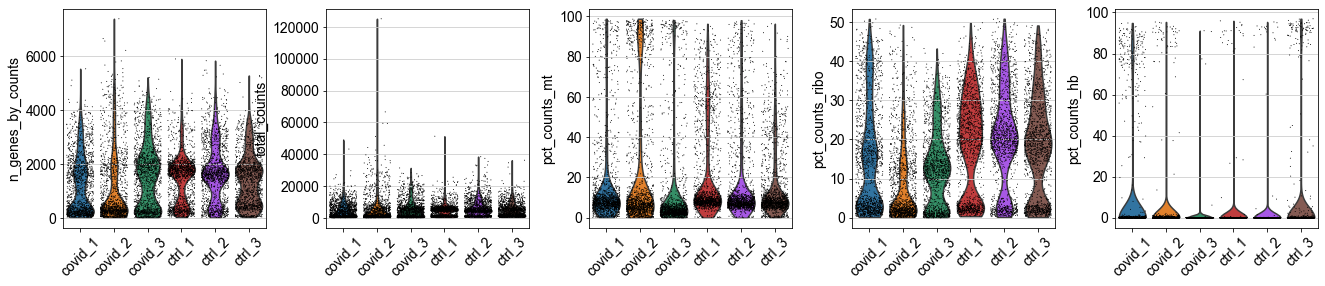

In [64]:
sc.pl.violin(all_data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'sample', rotation= 45)

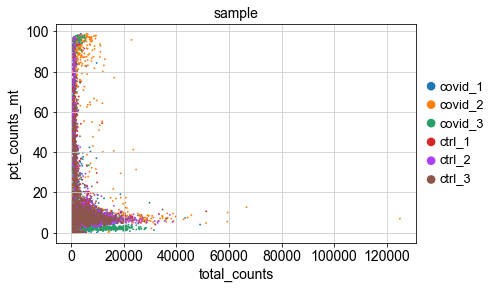

In [65]:
sc.pl.scatter(all_data, x='total_counts', y='pct_counts_mt', color="sample")

<h4> Question: Compare plots and indicate which sample has a higher level of mitochondrial genes?

<h3> Filtering

In [80]:
# consider cells with at least 200 detected genes and genes need to be expressed in at least 3 cells
sc.pp.filter_cells(all_data, min_genes=200)
sc.pp.filter_genes(all_data, min_cells=3)

print(all_data.n_obs, all_data.n_vars)

7978 18778


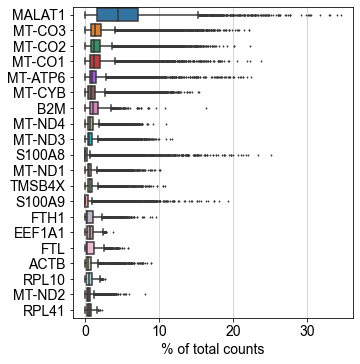

In [76]:
# which genes contribute the most to such reads.
sc.pl.highest_expr_genes(all_data, n_top=20) 

We generally want to have cell that have low amount of mitochondrial genes and high level of ribosomal genes, why?

Mitochondrial genes can be useful for filtering scRNA-seq data because they serve as an indicator of technical variation or poor-quality cells. Here are the reasons why mitochondrial genes are used in this context:

- Measurement of cell quality: The number of mitochondrial genes detected in a cell can be an indicator of cell quality. Cells with **high numbers of mitochondrial genes may represent low-quality cells that are undergoing stress, apoptosis, or experiencing technical artifacts during the experimental procedure**. By filtering out cells with a high percentage of mitochondrial genes, you can exclude potentially low-quality or damaged cells from downstream analysis.

- Removal of technical noise: In scRNA-seq, technical factors such as cell lysis efficiency or capture efficiency can introduce bias and noise. These technical factors can influence the number of reads originating from mitochondrial genes. By excluding cells with an excessive number of mitochondrial genes, you can mitigate the impact of technical noise on downstream analyses, thus improving the accuracy and reliability of the results.

- Mitochondrial gene expression as a confounding factor: Mitochondrial gene expression can sometimes interfere with the identification of biologically relevant signals in scRNA-seq analysis. Since mitochondrial genes are **highly expressed and can dominate the overall gene expression profile, they can mask or obscure the detection of gene expression changes in other biologically interesting genes or pathways**. Filtering out mitochondrial genes allows for a clearer focus on genes of interest and enhances the sensitivity to detect meaningful biological variations.

Ribosomal genes are commonly observed and considered acceptable in scRNA-seq analysis due to several reasons:

- Abundance and stability: **Ribosomal genes are highly expressed and exist in multiple copies within the cell**. They play a fundamental role in protein synthesis and **are required for the normal functioning of cells**. Their **high abundance ensures a sufficient number of reads during sequencing**, contributing to the overall robustness of the scRNA-seq data. Additionally, ribosomal genes are known for their **stable expression across different cell types**, making them reliable internal controls for normalization and technical comparisons.

- Conserved expression patterns: Ribosomal genes are expressed constitutively across most cell types and conditions. Their expression levels remain relatively constant and are less influenced by biological variation or experimental artifacts. Including ribosomal genes in the analysis helps to maintain consistency and accuracy in gene expression measurements, as they serve as a baseline reference for normalization and comparison across cells.

- Housekeeping gene representation: Ribosomal genes are often categorized as **housekeeping genes**, which are essential for basic cellular functions and are stably expressed across diverse cell types. Including ribosomal genes allows for a representative assessment of housekeeping gene expression and provides a reference point for evaluating the relative expression levels of other genes of interest.

- Quality control measure: Similar to mitochondrial genes, the detection of a sufficient number of ribosomal genes in scRNA-seq data can serve as a quality control metric. Cells with a low number of ribosomal gene reads may indicate poor quality or technical issues in the data, such as insufficient RNA capture or degradation. By ensuring an adequate representation of ribosomal genes, one can filter out low-quality cells and enhance the reliability of downstream analyses.

In [82]:
all_data = all_data[all_data.obs['pct_counts_mt'] < 20, :] #less than 20% of mt genes
all_data = all_data[all_data.obs['pct_counts_ribo'] > 5, :] #more than 5% of ribosomal genes

print(f"Remaining cells {all_data.n_obs}")

Remaining cells 5761


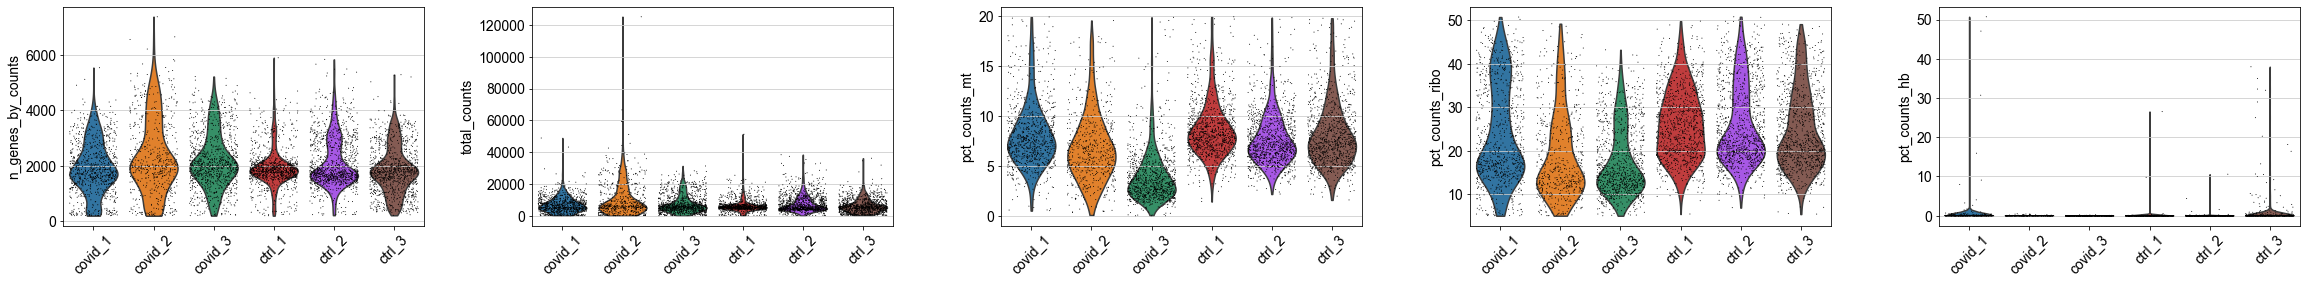

In [84]:
sc.pl.violin(all_data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'sample', rotation = 45)

In [85]:
#remove MALAT1, mt genes and hb genes

malat1 = all_data.var_names.str.startswith('MALAT1') 
mito_genes = all_data.var_names.str.startswith('MT-')
hb_genes = all_data.var_names.str.contains('^HB[^(P)]')

remove = np.add(mito_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

all_data = all_data[:,keep]

print(all_data.n_obs, all_data.n_vars)

5761 18752


<h3> Man or woman?

- based on chrosome Y genes?
- based on XIST (X-inactive specific transcript)

In [86]:
#need to install pybiomart
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [90]:
chrY_genes = all_data.var_names.intersection(annot.index[annot.chromosome_name == "Y"]) #which genes are encoded on Y chromosome and are available in our data
chrY_genes

Index(['RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'PCDH11Y', 'USP9Y', 'DDX3Y',
       'UTY', 'TMSB4Y', 'NLGN4Y', 'TTTY14', 'KDM5D', 'EIF1AY', 'RPS4Y2'],
      dtype='object')

In [92]:
all_data.obs['percent_chrY'] = np.sum(all_data[:, chrY_genes].X, axis=1).A1 / np.sum(all_data.X, axis=1).A1 * 100

In [94]:
all_data.obs["XIST-counts"] = all_data.X[:,all_data.var_names.str.match('XIST')].toarray() #XIST counts

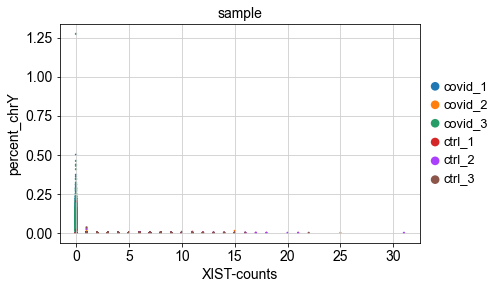

In [96]:
sc.pl.scatter(all_data, x='XIST-counts', y='percent_chrY', color="sample") #kazda kropka to jedna komorka

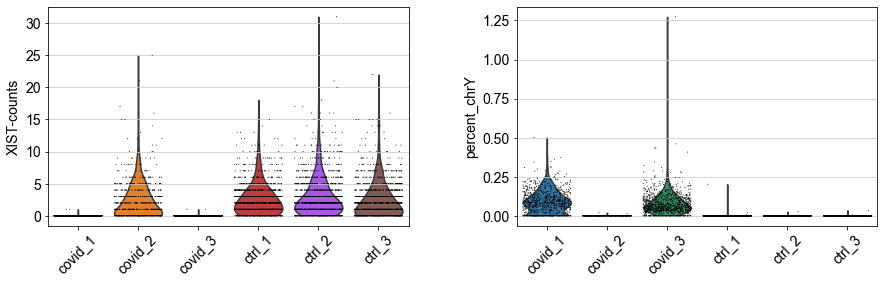

In [97]:
sc.pl.violin(all_data, ["XIST-counts", "percent_chrY"], jitter=0.4, groupby = 'sample', rotation= 45)

<h4> Question: Which samples are men?

<h3> Doublets

- Doublets occur when **two or more cells** are inadvertently captured and **processed together as a single entity**, resulting in a merged or mixed transcriptome. 

- Doublets can lead to distorted or **misleading results** because the gene expression profiles of two distinct cells are combined, potentially creating a hybrid profile. This can affect downstream analyses, including clustering, cell type identification, and differential expression analysis. Doublet detection and removal are important steps to ensure accurate interpretation of scRNA-seq data.

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.40
Detected doublet rate = 2.8%
Estimated detectable doublet fraction = 43.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.4%
Elapsed time: 15.2 seconds


159

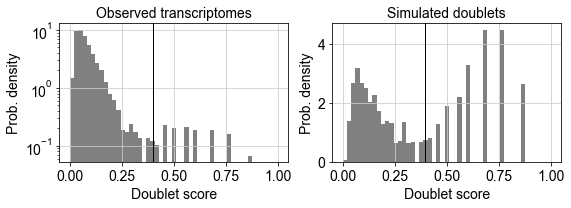

In [109]:
import scrublet as scr
scrub = scr.Scrublet(all_data._X)
all_data.obs['doublet_scores'], all_data.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(all_data.obs['predicted_doublets'])

In [110]:
# add in column with singlet/doublet instead of True/False
all_data.obs['doublet_info'] = all_data.obs["predicted_doublets"].astype(str)

In [111]:
all_data.obs['doublet_info'] 

AGGGTCCCATGACCCG-1-0     False
TACCCACAGCGGGTTA-1-0     False
CCCAACTTCATATGGC-1-0     False
TCAAGTGTCCGAACGC-1-0     False
ATTCCTAGTGACTGTT-1-0     False
                         ...  
CGCATAATCTTACGGA-14-5    False
GAGGCCTTCTCCTGCA-14-5    False
CCCTAACAGTTTCTTC-14-5    False
GGGATGATCAAGCTTG-14-5    False
CAATGACCACTGCATA-14-5    False
Name: doublet_info, Length: 5761, dtype: object

In [117]:
print(dir(all_data))

['T', 'X', '_BACKED_ATTRS', '_H5_ALIASES', '_H5_ALIASES_NAMES', '_X', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adata_ref', '_check_dimensions', '_check_uniqueness', '_clean_up_old_format', '_gen_repr', '_get_X', '_get_and_delete_multicol_field', '_get_obs_array', '_get_var_array', '_has_X', '_init_as_actual', '_init_as_view', '_inplace_subset_obs', '_inplace_subset_var', '_is_view', '_layers', '_mutated_copy', '_n_obs', '_n_vars', '_normalize_indices', '_obs', '_obsm', '_obsp', '_oidx', '_prep_dim_index', '_raw', '_remove_unused_categories', '_sanitize', '_set_backed', '_set_dim_df', '_set_dim_index', '_uns', '_var'

In [118]:
#remove doublets
all_data = all_data[all_data.obs['doublet_info'] == 'False',:]
print(all_data.shape)

(5602, 18752)


In [120]:
save_file = 'filtered_data.h5ad'
all_data.write_h5ad(save_file)